In [1]:
%run ./modules.ipynb
%run ./data.ipynb

/srv/conda/envs/notebook/lib/python3.7/site-packages/aiida/orm/groups.py:61: UserWarning: no registered entry point for `Group` so its instances will not be storable.
  warnings.warn(message)  # pylint: disable=no-member
/srv/conda/envs/notebook/lib/python3.7/site-packages/aiida/orm/groups.py:61: UserWarning: no registered entry point for `AutoGroup` so its instances will not be storable.
  warnings.warn(message)  # pylint: disable=no-member
/srv/conda/envs/notebook/lib/python3.7/site-packages/aiida/orm/groups.py:61: UserWarning: no registered entry point for `ImportGroup` so its instances will not be storable.
  warnings.warn(message)  # pylint: disable=no-member
/srv/conda/envs/notebook/lib/python3.7/site-packages/aiida/orm/groups.py:61: UserWarning: no registered entry point for `UpfFamily` so its instances will not be storable.
  warnings.warn(message)  # pylint: disable=no-member


PATH TO PRODUCTION DATA EXISTS


In [6]:
mp_frames=ase.io.read(DATA_MP.structures, index=':')
exp_frames=ase.io.read(DATA_3DCD.structures, index=':')

In [5]:
len(mp_frames), len(exp_frames)

(83989, 79854)

In [7]:
natoms_mp=np.zeros(len(mp_frames))
natoms_exp=np.zeros(len(exp_frames))
for i, k in zip(mp_frames, range(len(mp_frames))):
    i.wrap(eps=1e-10)
    natoms_mp[k]=len(i)
    
for i, k in zip(exp_frames, range(len(exp_frames))):
    i.wrap(eps=1e-10)
    natoms_exp[k]=len(i)

In [20]:
natoms_mp.max()

296.0

Text(0.5, 0, '$N_{atoms, cell}$')

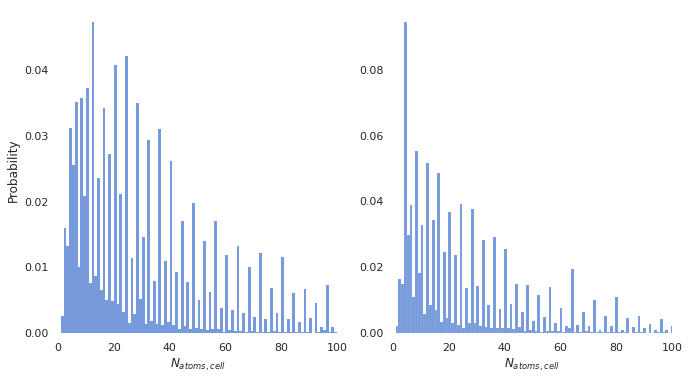

In [17]:
sns.set(style="white", palette="muted", color_codes=True)

fig, (ax1, ax2)= plt.subplots(1,2,figsize=(11,6))
sns.histplot(ax=ax2, data=natoms_mp, stat='probability', bins=int(natoms_mp.max()))
sns.histplot(ax=ax1, data=natoms_exp, stat='probability', bins=int(natoms_exp.max()))
sns.despine(left=True, bottom=True)
ax1.set_xlim(0,100)
ax2.set_ylabel(None)
ax2.set_xlim(0,100)
ax1.set_xlabel(r"$N_{atoms, cell}$")
ax2.set_xlabel(r"$N_{atoms, cell}$")

Calculating the Jensen-Shannon divergence to quanitfy the Rule of Four (link that explains differences between KL and JS divergences: https://yongchaohuang.github.io/2020-07-08-kl-divergence/).

In [ ]:
from scipy.spatial import distance

p=sns.histplot(data=natoms_exp, stat='probability', bins=int(natoms_exp.max()),kde=True)
kdeline = p.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
sns.despine(left=True, bottom=True)
plt.xlim(0,100)
plt.show()
r_h_magic=np.asarray([h.get_height() for h in p.patches][0:200][3::4])
n_h_magic=ys[0:200][3::4]
len(r_h_magic), len(n_h_magic)

js_magic=distance.jensenshannon(r_h_magic, n_h_magic)
print('The JS divergence between the histogram and its smooth counterpart for the 3DCD data set is equivalent to ', 
      js_magic)

p=sns.histplot(data=natoms_mp, stat='probability', bins=int(natoms_mp.max()),kde=True)
kdeline = p.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
sns.despine(left=True, bottom=True)
plt.xlim(0,100)
plt.show()
r_h_magic=np.asarray([h.get_height() for h in p.patches][0:200][3::4])
n_h_magic=ys[0:200][3::4]
len(r_h_magic), len(n_h_magic)

js_magic=distance.jensenshannon(r_h_magic, n_h_magic)
print('The JS divergence between the histogram and its smooth counterpart for the MP data set is equivalent to ', 
      js_magic)